<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Analiticas_Agiles_Kanban_en_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib
import pandas as pd #pandas

In [2]:
#lectura base de datos equipo agile
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTPwEM4f6YoBsqhFdJa9Z0AvGpvPBmJQnr2zGusI5S724NeFqPVwjJoLC-yygUkavo3S2wjKLepobwN/pub?output=csv')


In [3]:
#limpiar registros sin leadtime
#visualizar base de datos
base = df.dropna(subset=['Leadtime (dias)'])
base.head()

base.tail()

,ID,Tarea,Tipologia,Fecha Seleccionada,Fecha Done,Leadtime (dias),Semana Seleccionado,Semana Done,Satisfaccion
71,Ob19,Ob386,Maintenance,13/12/2019,10/01/2020,29.0,50,2.0,1.0
72,Pu296,Pu459,Maintenance,20/01/2020,4/02/2020,16.0,4,6.0,1.0
73,Re156,Re473,ADSS,3/02/2020,14/02/2020,12.0,6,7.0,2.0
74,Pr28,Pr376,Maintenance,10/02/2020,14/02/2020,5.0,7,7.0,5.0
75,Pr347,Pr332,Maintenance,17/02/2020,20/02/2020,4.0,8,8.0,3.0


In [23]:
#1 Tabla general
table1 = pd.pivot_table(data=base,index=['Tipologia'])
table1

,Leadtime (dias),Satisfaccion,Semana Done,Semana Seleccionado
Tipologia,,,,
ADSS,5.772727,3.272727,23.181818,25.000000
Maintenance,7.680851,3.297872,25.042553,26.489362


In [5]:
#2 Tabla vista por tipologia con: cantidad requerimientos terminados, leadtime y satisfaccion media
table2 = pd.pivot_table(data=base,index=['Tipologia'],values=['ID','Satisfaccion', 'Leadtime (dias)'], aggfunc={'ID':np.size, 'Leadtime (dias)':np.average,'Satisfaccion':np.mean})
table2


,ID,Leadtime (dias),Satisfaccion
Tipologia,,,
ADSS,22,5.772727,3.272727
Maintenance,47,7.680851,3.297872


In [77]:
#2 Otra vista
table2b = pd.pivot_table(base, index = ['Tipologia'], values = ['Leadtime (dias)', 'Satisfaccion'] , aggfunc = [np.size, np.std]) 
table2b


size                          std             
            Leadtime (dias) Satisfaccion Leadtime (dias) Satisfaccion
Tipologia                                                            
ADSS                   22.0         22.0        5.079668     1.638287
Maintenance            47.0         47.0        7.253504     1.531054

In [93]:
#filtrando
#ejemplo conocer registros de tipologia ADDS con satisfaccion iguala 4 o 5
#base[(base['Satisfaccion']>=4) & (base['Satisfaccion']< 6) & (base['Tipologia'].str.startswith('A'))]

base.query('Satisfaccion >= 4 & Satisfaccion < 6 & Tipologia.str.startswith("A").values')


,ID,Tarea,Tipologia,Fecha Seleccionada,Fecha Done,Leadtime (dias),Semana Seleccionado,Semana Done,Satisfaccion
23,Ag43,Ag411,ADSS,1/07/2019,4/07/2019,4.0,27,27.0,5.0
24,Er358,Er424,ADSS,4/07/2019,5/07/2019,2.0,27,27.0,5.0
25,So152,So420,ADSS,1/07/2019,1/07/2019,1.0,27,27.0,5.0
26,Ca79,Ca49,ADSS,4/07/2019,4/07/2019,1.0,27,27.0,4.0
27,Ha188,Ha367,ADSS,25/06/2019,27/06/2019,3.0,26,26.0,4.0
28,IQ217,IQ332,ADSS,3/07/2019,5/07/2019,3.0,27,27.0,4.0
31,Re319,Re113,ADSS,24/06/2019,24/06/2019,1.0,26,26.0,5.0
32,Pr468,Pr472,ADSS,18/06/2019,21/06/2019,4.0,25,25.0,4.0
33,Va377,Va371,ADSS,8/07/2019,8/07/2019,1.0,28,28.0,5.0
34,So399,So424,ADSS,8/07/2019,9/07/2019,2.0,28,28.0,4.0


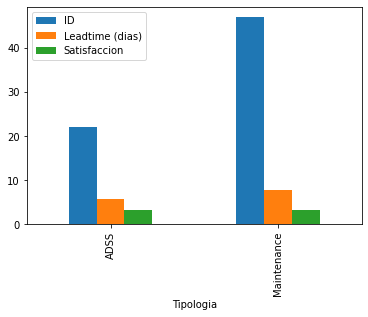

In [94]:
table2.plot(kind='bar');

              ID
Satisfaccion    
1.0           15
2.0            9
3.0            7
4.0           17
5.0           21


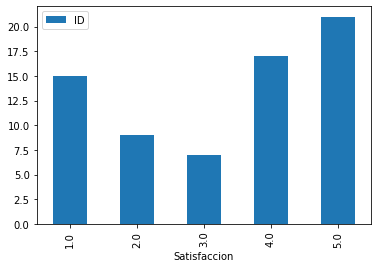

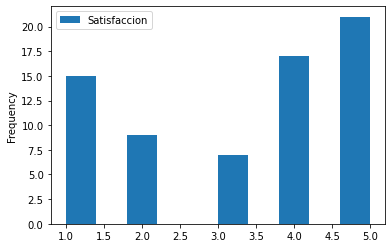

In [6]:
#Histograma satisfaccion clientes
#crear tabla
table3 = pd.pivot_table(base,index=['Satisfaccion'],values=['ID'],aggfunc=np.size)
print(table3)

#visualizar grafico
table3.plot(kind='bar');

#otra forma para crear histograma
base.plot(y='Satisfaccion',kind='hist')

                 ID
Leadtime (dias)    
1.0               7
2.0               9
3.0              13
4.0               8
5.0               9
6.0               3
8.0               1
11.0              1
12.0              2
14.0              3
16.0              6
17.0              1
19.0              4
26.0              1
29.0              1


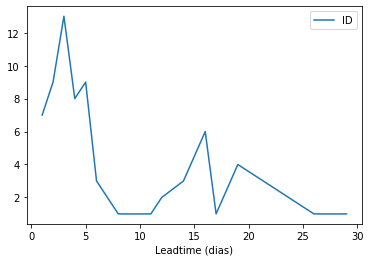

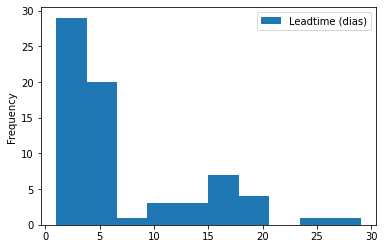

In [7]:
#Histograma leadtime
#crear tabla
table4 = pd.pivot_table(base,index=['Leadtime (dias)'],values=['ID'],aggfunc=np.size)
print(table4)

#crear grafico
table4.plot(kind='line');

#otra forma para crear histograma
base.plot(y='Leadtime (dias)',kind='hist')

                 Satisfaccion
Leadtime (dias)              
1.0                  4.857143
2.0                  4.666667
3.0                  4.076923
4.0                  3.875000
5.0                  3.888889
6.0                  2.000000
8.0                  1.000000
11.0                 2.000000
12.0                 1.500000
14.0                 1.333333
16.0                 1.166667
17.0                 2.000000
19.0                 1.250000
26.0                 1.000000
29.0                 1.000000


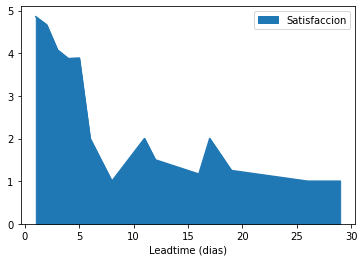

In [8]:
#Analisis de umbral de satisfaccion frente a leadtime
#crear tabla
table5 = pd.pivot_table(base,index=['Leadtime (dias)'],values=['Satisfaccion'],aggfunc=np.mean)
print(table5)

#graficar
table5.plot(kind='area');

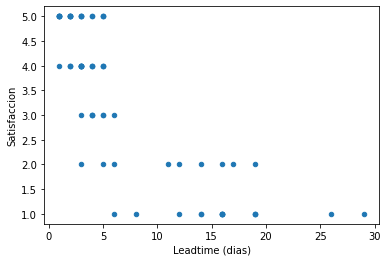

In [9]:
#grafico de dispersion:  leadtime VS satisfaccion

base.plot(x='Leadtime (dias)',y='Satisfaccion',kind='scatter')

**Conclusión análisis de umbrales:**

La satisfacción de los clientes disminuye cuando el tiempo de respuesta a los requerimientos de clientes excede los 5 días.

Según análisis presentado en tabla 4, un 33% de los requerimientos sobrepasan este valor,  se deben analizar estos casos para determinar un patrón que explique dicho resultado.



---

**Velocidad del equipo**

In [169]:
#Velocidad semanal

#construya su codigo aquí, analice y concluya


#realice una simulación montecarlo con las semanas donde alcanzan estabilidad

In [20]:


multi_functions = pd.pivot_table(base, index = ['Tipologia', 'Satisfaccion'], values = 'Leadtime (dias)', aggfunc = [np.size, np.std]) 
print(multi_functions)


                                    size             std
                         Leadtime (dias) Leadtime (dias)
Tipologia   Satisfaccion                                
ADSS        1.0                      5.0        5.215362
            2.0                      4.0        4.242641
            4.0                      6.0        1.032796
            5.0                      7.0        1.718249
Maintenance 1.0                     10.0        5.169354
            2.0                      5.0        5.449771
            3.0                      7.0        0.975900
            4.0                     11.0        1.128152
            5.0                     14.0        1.286019
